In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("../../datasets/Invoices_Std.csv", encoding='latin-1', low_memory=False)

In [8]:
def custom_colored_barplot(ax, data, bins=None, color_map='jet', bar_separation=0.8):
    if bins is None:
        counts, bin_edges = np.histogram(data, bins=30)
    else:
        counts, bin_edges = np.histogram(data, bins=bins)
    
    max_count = counts.max()
    min_count = counts.min()
    
    if max_count == min_count:
        normalized_counts = np.zeros_like(counts, dtype=float)
    else:
        normalized_counts = (counts - min_count) / (max_count - min_count)
        
    colors = [mpl.colormaps[color_map](nc) for nc in normalized_counts]
    
    bar_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bar_widths = bin_edges[1:] - bin_edges[:-1]
    
    x_labels = [f'[{int(bin_edges[i])}-{int(bin_edges[i+1])}]' for i in range(len(counts))]
    
    for i in range(len(counts)):
        ax.bar(bar_centers[i], counts[i], 
               width=bar_widths[i] * bar_separation,
               edgecolor='black', color=colors[i], align='center')
        
    ax.set_xticks(bar_centers)

    if bins > 12:
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
    else:
        ax.set_xticklabels(x_labels)
    
    sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=min_count, vmax=max_count))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Tần suất')

    return ax

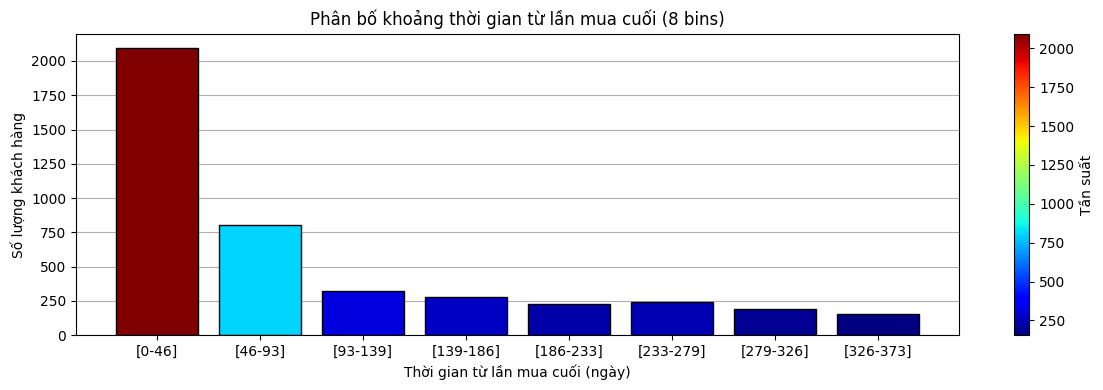

In [9]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df = df[df["Is_Canceled"] == 0]
max_date = df["InvoiceDate"].max()

recency = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()
recency["Recency"] = (max_date - recency["InvoiceDate"]).dt.days

fig, ax = plt.subplots(figsize=(12, 4))
ax.grid(axis='y')
ax.set_axisbelow(True)
custom_colored_barplot(ax, recency["Recency"], bins=8, color_map='jet')
ax.set_title("Phân bố khoảng thời gian từ lần mua cuối (8 bins)")
ax.set_xlabel("Thời gian từ lần mua cuối (ngày)")
ax.set_ylabel("Số lượng khách hàng")
plt.tight_layout()
plt.show()

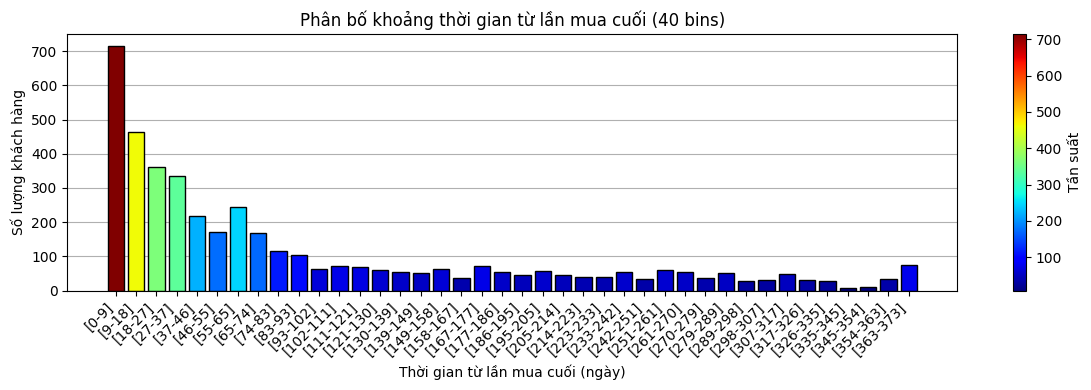

In [10]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.grid(axis='y')
ax.set_axisbelow(True)
custom_colored_barplot(ax, recency["Recency"], bins=40, color_map='jet')
ax.set_title("Phân bố khoảng thời gian từ lần mua cuối (40 bins)")
ax.set_xlabel("Thời gian từ lần mua cuối (ngày)")
ax.set_ylabel("Số lượng khách hàng")
plt.tight_layout()
plt.show()

Phần lớn khách hàng có Recency rất thấp (0–30 ngày) nghĩa là hoạt động mua hàng diễn ra liên tục.

Phân bố lệch trái mạnh, hầu hết khách hàng mua sắm liên tục không để khoảng thời gian dài mới mua hàng.

Một nhóm khách hàng có thời gian quay lại cao từ 102 đến hơn 300 ngày đầy là nhóm khách hàng có khả năng rời bỏ cao.

Tóm lại hoạt động mua bán diễn ra tuần suất cao, một nhóm khách hàng nhỏ (dưới 100 khách) có khả năng rời bỏ.